In [1]:
import os
os.environ["OMP_NUM_THREADS"]='8'
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import timeit
import pysindy as ps
from scipy.special import erf
from IPython.display import Video

def kuramoto(t, theta, omegas, sigma, adj):
    c=np.cos(theta)
    s=np.sin(theta)
    return omegas + sigma * (s*adj.dot(c)-c*adj.dot(s))

./kuramoto -N 250 -K 4 -g 1 -s 1 -c 2.0 -t 30 -d 0.01 -vR data/250/4/1/1 

runtime: 2.478769



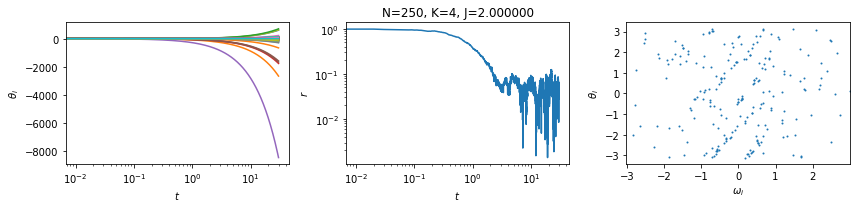

In [2]:
filebase='data/250/4/1/1'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float32)
N=len(omega)
if os.path.exists(filebase+'thetas.dat'):
    thetas=np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N))
else:
    thetas=np.zeros(N)
r=np.fromfile(filebase+'order.dat',dtype=np.float32)
coupling=np.fromfile(filebase+'fs.dat',dtype=np.float32)[N+2:]
coupling=coupling[::2]+1j*coupling[1::2]
theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]


plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.plot(dt*np.arange(len(thetas)),thetas)
plt.xlabel('$t$')
plt.ylabel(r'$\theta_i$')
plt.xscale('log')


plt.subplot(1,3,2)
plt.plot(dt*np.arange(len(r)),r)
plt.title("N=%i, K=%i, J=%f"%(N,K,c))

plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,3,3)
theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]
order=np.argsort(omega)
plt.scatter(omega,np.mod(theta+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-3,np.median(omega)+3)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.savefig('%s.pdf'%(filebase))
plt.show()

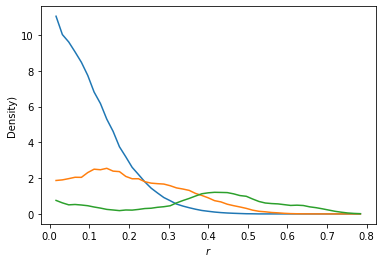

In [3]:
for g in range(3):
    vals=[]
    for seed in range(1,501):
        print("%i\r"%(seed),end='')
        filebase='data/250/4/%i/%i'%(g,seed)
        if os.path.exists(filebase+'fs.dat'):
            file=open(filebase+'.out')
            lines=file.readlines()
            N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
            N=int(N)
            K=int(K)
            file.close()


            couplings=np.fromfile(filebase+'couplings.dat',dtype=np.float32)
            couplings=(couplings[::2]+1j*couplings[1::2]).reshape(-1,N)
            vals=vals+[np.abs(couplings[1000:].reshape(-1))]

    count,bins=np.histogram(np.concatenate(vals),bins=np.arange(50)/50*0.8)
    plt.plot(bins[1:],count/(np.sum(count)*(2*np.pi)*(bins[:-1]+bins[1:])/2*(bins[1]-bins[0])))
    plt.xlabel('$r$')
    plt.ylabel('Density)')


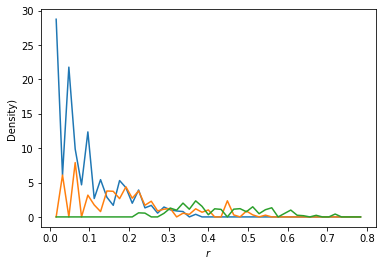

In [4]:
for g in range(3):
    vals=[]
    for seed in range(1,501):
        print("%i\r"%(seed),end='')
        filebase='data/250/4/%i/%i'%(g,seed)
        if os.path.exists(filebase+'fs.dat'):
            file=open(filebase+'.out')
            lines=file.readlines()
            N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
            N=int(N)
            K=int(K)
            file.close()


            coupling=np.fromfile(filebase+'fs.dat',dtype=np.float32)[-2*N:]
            coupling=coupling[::2]+1j*coupling[1::2]
            vals=vals+[np.abs(coupling)]

    count,bins=np.histogram(np.concatenate(vals),bins=np.arange(50)/50*0.8)
    plt.plot(bins[1:],count/(np.sum(count)*(2*np.pi)*(bins[:-1]+bins[1:])/2*(bins[1]-bins[0])))
    plt.xlabel('$r$')
    plt.ylabel('Density)')


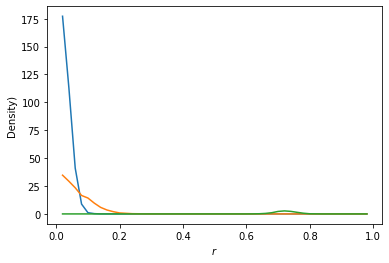

In [5]:
for g in range(3):
    vals=[]
    for seed in range(1,501):
        print("%i  \r"%(seed),end='')
        filebase='data2/5000/4/%i/%i'%(g,seed)
        if os.path.exists(filebase+'fs.dat'):
            file=open(filebase+'.out')
            lines=file.readlines()
            N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
            N=int(N)
            K=int(K)
            file.close()


            coupling=np.fromfile(filebase+'fs.dat',dtype=np.float32)[-2*N:]
            coupling=coupling[::2]+1j*coupling[1::2]
            vals=vals+[np.abs(coupling)]

    count,bins=np.histogram(np.concatenate(vals),bins=np.arange(50)/50*1.0)
    plt.plot(bins[1:],count/(np.sum(count)*(2*np.pi)*(bins[:-1]+bins[1:])/2*(bins[1]-bins[0])))
    plt.xlabel('$r$')
    plt.ylabel('Density)')


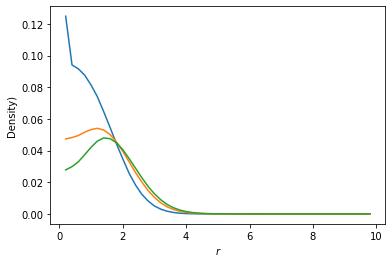

In [6]:
for g in range(3):
    vals=[]
    for seed in range(1,501):
        print("%i  \r"%(seed),end='')
        filebase='data2/5000/5000/%i/%i'%(g,seed)
        if os.path.exists(filebase+'fs.dat'):
            file=open(filebase+'.out')
            lines=file.readlines()
            N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
            N=int(N)
            K=int(K)
            file.close()


            coupling=np.fromfile(filebase+'fs.dat',dtype=np.float32)[-2*N:]
            coupling=coupling[::2]+1j*coupling[1::2]
            vals=vals+[np.abs(coupling)]

    count,bins=np.histogram(np.concatenate(vals),bins=np.arange(50)/50*10.0)
    plt.plot(bins[1:],count/(np.sum(count)*(2*np.pi)*(bins[:-1]+bins[1:])/2*(bins[1]-bins[0])))
    plt.xlabel('$r$')
    plt.ylabel('Density)')


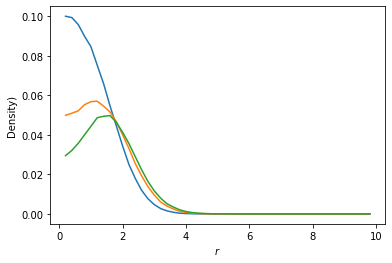

In [7]:
for g in range(3):
    vals=[]
    for seed in range(1,501):
        print("%i  \r"%(seed),end='')
        filebase='data2/500/500/%i/%i'%(g,seed)
        if os.path.exists(filebase+'fs.dat'):
            file=open(filebase+'.out')
            lines=file.readlines()
            N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
            N=int(N)
            K=int(K)
            file.close()


            coupling=np.fromfile(filebase+'fs.dat',dtype=np.float32)[-2*N:]
            coupling=coupling[::2]+1j*coupling[1::2]
            vals=vals+[np.abs(coupling)]

    count,bins=np.histogram(np.concatenate(vals),bins=np.arange(50)/50*10.0)
    plt.plot(bins[1:],count/(np.sum(count)*(2*np.pi)*(bins[:-1]+bins[1:])/2*(bins[1]-bins[0])))
    plt.xlabel('$r$')
    plt.ylabel('Density)')


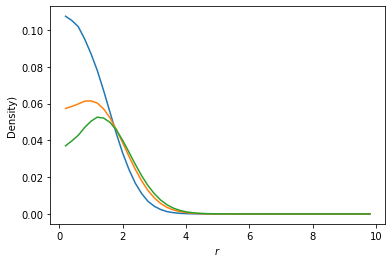

In [8]:
for g in range(3):
    vals=[]
    for seed in range(1,501):
        print("%i %i  \r"%(g,seed),end='')
        filebase='data3/5000/5000/%i/%i'%(g,seed)
        if os.path.exists(filebase+'fs.dat'):
            file=open(filebase+'.out')
            lines=file.readlines()
            N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
            N=int(N)
            K=int(K)
            file.close()


            coupling=np.fromfile(filebase+'fs.dat',dtype=np.float32)[-2*N:]
            coupling=coupling[::2]+1j*coupling[1::2]
            vals=vals+[np.abs(coupling)]

    count,bins=np.histogram(np.concatenate(vals),bins=np.arange(50)/50*10.0)
    plt.plot(bins[1:],count/(np.sum(count)*(2*np.pi)*(bins[:-1]+bins[1:])/2*(bins[1]-bins[0])))
    plt.xlabel('$r$')
    plt.ylabel('Density)')


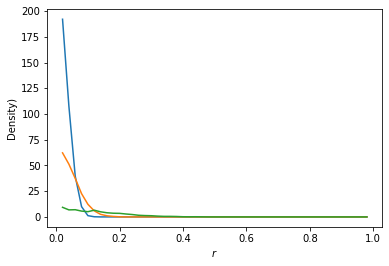

In [64]:
for g in range(3):
    vals=[]
    for seed in range(1,501):
        print("%i %i  \r"%(g,seed),end='')
        filebase='data3/5000/4/%i/%i'%(g,seed)
        if os.path.exists(filebase+'fs.dat'):
            file=open(filebase+'.out')
            lines=file.readlines()
            N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
            N=int(N)
            K=int(K)
            file.close()


            coupling=np.fromfile(filebase+'fs.dat',dtype=np.float32)[-2*N:]
            coupling=coupling[::2]+1j*coupling[1::2]
            vals=vals+[np.abs(coupling)]

    count,bins=np.histogram(np.concatenate(vals),bins=np.arange(50)/50*1.0)
    plt.plot(bins[1:],count/(np.sum(count)*(2*np.pi)*(bins[:-1]+bins[1:])/2*(bins[1]-bins[0])))
    plt.xlabel('$r$')
    plt.ylabel('Density)')


In [63]:
N=5000
K=6
c=1.75
t1=10000
dt=0.1
seed=1
filebase='data/newtest1'
print('Store whole adjacency matrix with single precision')
if os.path.exists(filebase+'.out'):
    os.remove(filebase+'.out')
os.system('./kuramoto -g 3 -N %i -K %i -c %f -t %f -d %f -s %i -nv %s'%(N,K,c,0,dt,seed,filebase))
os.system('./kuramoto -g 3 -N %i -K %i -c %f -t %f -d %f -s %i -nDv %s'%(N,K,c,t1,dt,seed,filebase))

Store whole adjacency matrix with single precision
GPU Memory: 10977411072 11543379968 102240000
Using random initial conditions
Using random frequencies
Using random adjacency matrix

runtime: 0.625604
GPU Memory: 10977411072 11543379968 102240000
Using random initial conditions
Using random frequencies
Using random adjacency matrix
1.000	2.656e+02	-1.077e-03	0.076889	73193	
runtime: 265.643897


0

In [33]:
N=5000
K=6
c=1.0
t1=10000
dt=0.1
seed=1
filebase='data/newtest2'
print('Store whole adjacency matrix with single precision')
if os.path.exists(filebase+'.out'):
    os.remove(filebase+'.out')
os.system('./kuramoto -g 3 -N %i -K %i -c %f -t %f -d %f -s %i -nv %s'%(N,K,c,0,dt,seed,filebase))
os.system('./kuramoto -g 3 -N %i -K %i -c %f -t %f -d %f -s %i -nDv %s'%(N,K,c,t1,dt,seed,filebase))

Store whole adjacency matrix with single precision
GPU Memory: 10977411072 11543379968 102240000
Using random initial conditions
Using random frequencies
Using random adjacency matrix

runtime: 0.452408
GPU Memory: 10977411072 11543379968 102240000
Using random initial conditions
Using random frequencies
Using random adjacency matrix
1.000	4.682e+01	-1.780e-03	0.494121	18487	
runtime: 46.824814


0

In [36]:
N=5000
K=5000
c=1.0
t1=10000
dt=0.1
seed=1
filebase='data/newtest3'
print('Store whole adjacency matrix with single precision')
if os.path.exists(filebase+'.out'):
    os.remove(filebase+'.out')
os.system('./kuramoto -g 3 -N %i -K %i -c %f -t %f -d %f -s %i -nv %s'%(N,K,c,0,dt,seed,filebase))
os.system('./kuramoto -g 3 -N %i -K %i -c %f -t %f -d %f -s %i -nDv %s'%(N,K,c,t1,dt,seed,filebase))

Store whole adjacency matrix with single precision
GPU Memory: 10977411072 11543379968 302000000
Using random initial conditions
Using random frequencies
Using random adjacency matrix

runtime: 0.335931
GPU Memory: 10977411072 11543379968 302000000
Using random initial conditions
Using random frequencies
Using random adjacency matrix
1.000	3.228e+02	-6.927e-04	0.047616	117076	
runtime: 322.811291


0

In [61]:
N=5000
K=5000
c=3
t1=10000
dt=0.1
seed=1
filebase='data/newtest4'
print('Store whole adjacency matrix with single precision')
if os.path.exists(filebase+'.out'):
    os.remove(filebase+'.out')
os.system('./kuramoto -g 3 -N %i -K %i -c %f -t %f -d %f -s %i -nv %s'%(N,K,c,0,dt,seed,filebase))
os.system('./kuramoto -g 3 -N %i -K %i -c %f -t %f -d %f -s %i -nDv %s'%(N,K,c,t1,dt,seed,filebase))

Store whole adjacency matrix with single precision
GPU Memory: 10977411072 11543379968 302000000
Using random initial conditions
Using random frequencies
Using random adjacency matrix

runtime: 0.441649
GPU Memory: 10977411072 11543379968 302000000
Using random initial conditions
Using random frequencies
Using random adjacency matrix
1.000	3.936e+02	-5.161e-04	0.075043	113251	
runtime: 393.607746


0

./kuramoto -g 3 -N 5000 -K 6 -c 1.750000 -t 0.000000 -d 0.100000 -s 1 -nv data/newtest1 

runtime: 265.643897



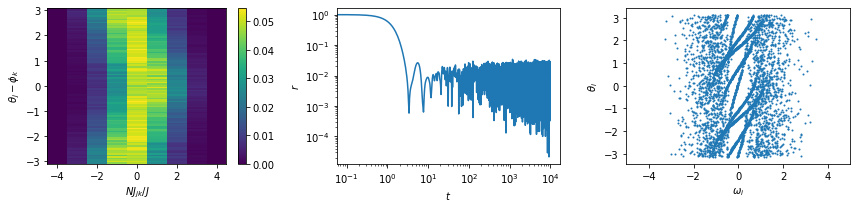

In [65]:
filebase='data/newtest1'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float32)
N=len(omega)
thetas=np.unwrap(np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N)),axis=0)
theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]
r=np.fromfile(filebase+'order.dat',dtype=np.float32)
adj=np.fromfile(filebase+'adj.dat',dtype=np.float32).reshape((N,N))
coupling=np.fromfile(filebase+'fs.dat',dtype=np.float32)[N+2:]
B=np.mod(theta[:,np.newaxis]-np.arctan2(coupling[1::2],coupling[::2])[np.newaxis,:]+np.pi,2*np.pi)-np.pi


plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.hist2d(N/2*adj.reshape(-1),B.reshape(-1),bins=(np.arange(10)-5+0.5,np.pi*(np.arange(100)-50+0.5)/50),density=True)
plt.xlabel(r'$NJ_{jk}/J$')
plt.ylabel(r'$\theta_j-\phi_k$')
plt.colorbar()

plt.subplot(1,3,2)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,3,3)
order=np.argsort(omega)
plt.scatter(omega,np.mod(theta+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()



./kuramoto -g 3 -N 5000 -K 6 -c 1.000000 -t 0.000000 -d 0.100000 -s 1 -nv data/newtest2 

runtime: 46.824814



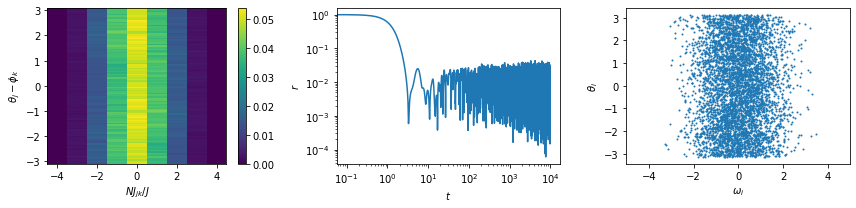

In [58]:
filebase='data/newtest2'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float32)
N=len(omega)
thetas=np.unwrap(np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N)),axis=0)
theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]
r=np.fromfile(filebase+'order.dat',dtype=np.float32)
adj=np.fromfile(filebase+'adj.dat',dtype=np.float32).reshape((N,N))
coupling=np.fromfile(filebase+'fs.dat',dtype=np.float32)[N+2:]
B=np.mod(theta[:,np.newaxis]-np.arctan2(coupling[1::2],coupling[::2])[np.newaxis,:]+np.pi,2*np.pi)-np.pi


plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.hist2d(N/2*adj.reshape(-1),B.reshape(-1),bins=(np.arange(10)-5+0.5,np.pi*(np.arange(100)-50+0.5)/50),density=True)
plt.xlabel(r'$NJ_{jk}/J$')
plt.ylabel(r'$\theta_j-\phi_k$')
plt.colorbar()

plt.subplot(1,3,2)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,3,3)
order=np.argsort(omega)
plt.scatter(omega,np.mod(theta+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()



./kuramoto -g 3 -N 5000 -K 5000 -c 1.000000 -t 0.000000 -d 0.100000 -s 1 -nv data/newtest3 

runtime: 322.811291



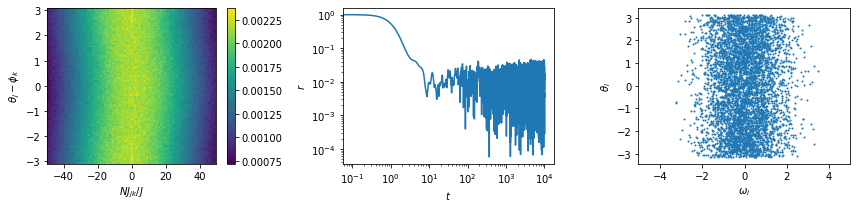

In [59]:
filebase='data/newtest3'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float32)
N=len(omega)
thetas=np.unwrap(np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N)),axis=0)
theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]
r=np.fromfile(filebase+'order.dat',dtype=np.float32)
adj=np.fromfile(filebase+'adj.dat',dtype=np.float32).reshape((N,N))
coupling=np.fromfile(filebase+'fs.dat',dtype=np.float32)[N+2:]
B=np.mod(theta[:,np.newaxis]-np.arctan2(coupling[1::2],coupling[::2])[np.newaxis,:]+np.pi,2*np.pi)-np.pi


plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.hist2d(N/2*adj.reshape(-1),B.reshape(-1),bins=(np.arange(100)-50+0.5,np.pi*(np.arange(100)-50+0.5)/50),density=True)
plt.xlabel(r'$NJ_{jk}/J$')
plt.ylabel(r'$\theta_j-\phi_k$')
plt.colorbar()

plt.subplot(1,3,2)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,3,3)
order=np.argsort(omega)
plt.scatter(omega,np.mod(theta+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()



./kuramoto -g 3 -N 5000 -K 5000 -c 3.000000 -t 0.000000 -d 0.100000 -s 1 -nv data/newtest4 

runtime: 393.607746



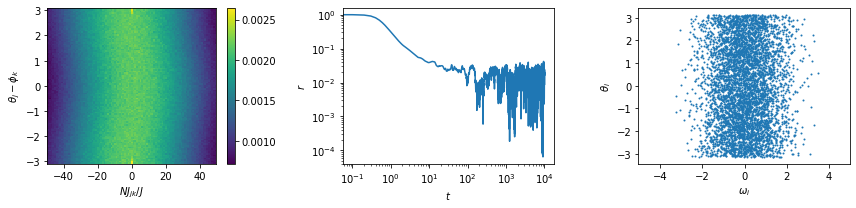

In [62]:
filebase='data/newtest4'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float32)
N=len(omega)
thetas=np.unwrap(np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N)),axis=0)
theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]
r=np.fromfile(filebase+'order.dat',dtype=np.float32)
adj=np.fromfile(filebase+'adj.dat',dtype=np.float32).reshape((N,N))
coupling=np.fromfile(filebase+'fs.dat',dtype=np.float32)[N+2:]
B=np.mod(theta[:,np.newaxis]-np.arctan2(coupling[1::2],coupling[::2])[np.newaxis,:]+np.pi,2*np.pi)-np.pi


plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.hist2d(N/2*adj.reshape(-1),B.reshape(-1),bins=(np.arange(100)-50+0.5,np.pi*(np.arange(100)-50+0.5)/50),density=True)
plt.xlabel(r'$NJ_{jk}/J$')
plt.ylabel(r'$\theta_j-\phi_k$')
plt.colorbar()

plt.subplot(1,3,2)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,3,3)
order=np.argsort(omega)
plt.scatter(omega,np.mod(theta+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()



## Dynamics for individual simulations

In [5]:
N=10000
K=10000
seed=1
c=1.75
t1=100
dt=1E-2
print('Store whole adjacency matrix with single precision')
os.system('./kuramoto -N %i -K %i -c %f -t %f -d %f -s %i -nv data/test'%(N,K,c,t1,dt,seed))
print('\nRecalculate adjacency elements each step with single precision')
os.system('./kuramoto -N %i -K %i -c %f -t %f -d %f -s %i -nvA data/testA'%(N,K,c,t1,dt,seed))
print('\nStore whole adjacency matrix with double precision')
os.system('./kuramoto_64 -N %i -K %i -c %f -t %f -d %f -s %i -nv data/test64'%(N,K,c,t1,dt,seed))

Store whole adjacency matrix with single precision
GPU Memory: 7421755392 11546394624 1204000000
Using random initial conditions
Using random frequencies
Using random adjacency matrix
1.001	1.114e+01	-6.031e-03	0.122134	845	
runtime: 11.142209

Recalculate adjacency elements each step with single precision
GPU Memory: 7421755392 11546394624 4000000
Using random initial conditions
Using random frequencies
Using random adjacency matrix
1.000	2.931e+01	-4.484e-03	0.121609	846	
runtime: 29.311773

Store whole adjacency matrix with double precision
GPU Memory: 7421755392 11546394624 2408000000
Using random initial conditions
Using random frequencies
Using random adjacency matrix
1.000	2.643e+01	-8.399e-03	0.116377	844	
runtime: 26.430251


0

./kuramoto -N 10000 -K 10000 -c 1.750000 -t 100.000000 -d 0.010000 -s 1 -nv data/test 

runtime: 11.142209



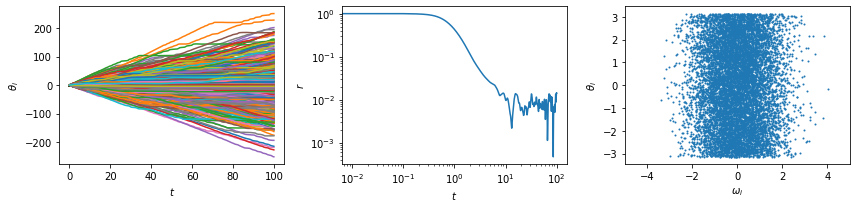

In [7]:
filebase='data/test'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float32)
N=len(omega)
thetas=np.unwrap(np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N)),axis=0)
r=np.fromfile(filebase+'order.dat',dtype=np.float32)

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.plot(dt*np.arange(len(thetas)),thetas)
plt.xlabel('$t$')
plt.ylabel(r'$\theta_i$')

plt.subplot(1,3,2)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,3,3)
theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]
order=np.argsort(omega)
plt.scatter(omega,np.mod(theta+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()

./kuramoto -N 10000 -K 10000 -c 1.750000 -t 100.000000 -d 0.010000 -s 1 -nvA data/testA 

runtime: 28.431965



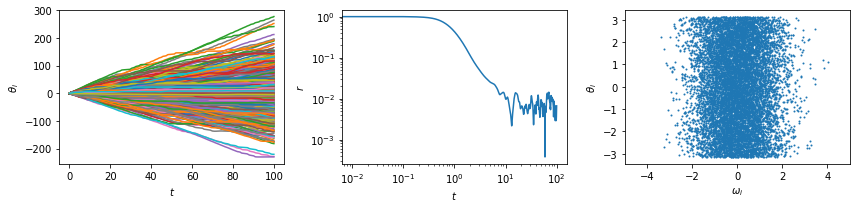

In [4]:
filebase='data/testA'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float32)
N=len(omega)
thetas=np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N))
r=np.fromfile(filebase+'order.dat',dtype=np.float32)

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.plot(dt*np.arange(len(thetas)),thetas)
plt.xlabel('$t$')
plt.ylabel(r'$\theta_i$')

plt.subplot(1,3,2)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,3,3)
theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]
order=np.argsort(omega)
plt.scatter(omega,np.mod(theta+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()

./kuramoto_64 -N 10000 -K 10000 -c 1.750000 -t 100.000000 -d 0.010000 -s 1 -nv data/test64 

runtime: 25.083427



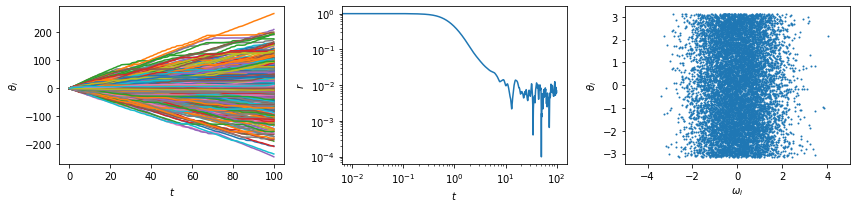

In [5]:
filebase='data/test64'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float64)
N=len(omega)
thetas=np.fromfile(filebase+'thetas.dat',dtype=np.float64).reshape((-1,N))
r=np.fromfile(filebase+'order.dat',dtype=np.float64)

plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.plot(dt*np.arange(len(thetas)),thetas)
plt.xlabel('$t$')
plt.ylabel(r'$\theta_i$')

plt.subplot(1,3,2)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,3,3)
theta=np.fromfile(filebase+'fs.dat',dtype=np.float64)[:N]
order=np.argsort(omega)
plt.scatter(omega,np.mod(theta+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()

### Animate a simulation

In [6]:
N=100000
K=100000
os.system('./kuramoto -N %i -K %i -c %f -t %f -d %f -s %i -nvAR data/testbig'%(N,K,c,t1,dt,seed))

GPU Memory: 9690808320 11546394624 40000000
Using initial conditions from file
Restarting at t=100.099480 with h=0.128280
Using frequencies from file
Using random adjacency matrix

runtime: 0.129930


0

./kuramoto -N 100000 -K 100000 -c 1.750000 -t 100.000000 -d 0.010000 -s 1 -nvA data/testbig 

runtime: 0.129930



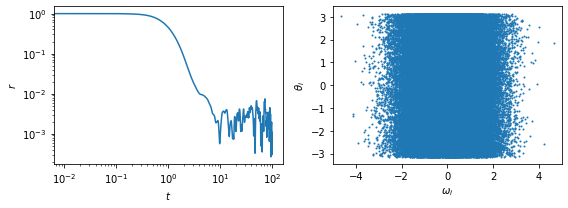

0

In [7]:
filebase='data/testbig'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float32)
N=len(omega)
thetas=np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N))
r=np.fromfile(filebase+'order.dat',dtype=np.float32)

plt.subplots(1,2,figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,2,2)
theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]
order=np.argsort(omega)
plt.scatter(omega,np.mod(theta+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()

if not os.path.exists(filebase+'animation'):
    os.mkdir(filebase+'animation')
else:
    os.system('rm %sanimation/*'%(filebase))
    
skip=5
for i in range(len(thetas)//skip):
    print('%i\t%i\t\r'%(i,len(thetas)//skip),end='')
    plt.figure(figsize=(4,4))
    plt.scatter(omega,np.mod(thetas[skip*i]+np.pi,2*np.pi)-np.pi,s=1)
    plt.xlim(np.median(omega)-5,np.median(omega)+5)
    plt.xlabel('$\omega_i$')
    plt.ylabel(r'$\theta_i$')
    plt.ylim(-np.pi,np.pi)
    plt.savefig(filebase+'animation/%04i.png'%i,dpi=200)
    plt.close()
    
if os.path.exists('%sanimation.mp4'%(filebase)):
    os.system('rm %sanimation.mp4'%(filebase))
os.system('encode.sh %sanimation %sanimation 15 &> /dev/null'%(filebase, filebase))

In [9]:
Video('%sanimation.mp4'%(filebase),width=256)

In [10]:
N=100000
K=6
os.system('./kuramoto -N %i -K %i -c %f -t %f -d %f -s %i -nvAR data/testbig2'%(N,K,c,t1,dt,seed))

GPU Memory: 9690808320 11546394624 40000000
Using initial conditions from file
Restarting at t=100.223038 with h=0.267916
Using frequencies from file
Using random adjacency matrix

runtime: 0.114384


0

./kuramoto -N 100000 -K 6 -c 1.750000 -t 100.000000 -d 0.010000 -s 1 -nvAR data/testbig2 

runtime: 0.114384

(10001, 100000)


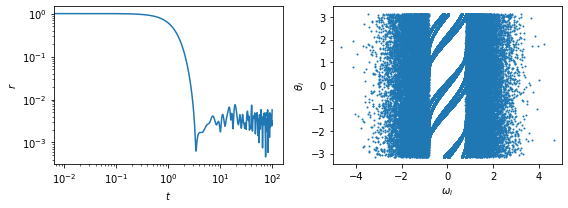

0

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [34]:
filebase='data/testbig2'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float32)
N=len(omega)
thetas=np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N))
print(thetas.shape)
r=np.fromfile(filebase+'order.dat',dtype=np.float32)

plt.subplots(1,2,figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,2,2)
theta=np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]
order=np.argsort(omega)
plt.scatter(omega,np.mod(theta+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()

if not os.path.exists(filebase+'animation'):
    os.mkdir(filebase+'animation')
else:
    os.system('rm %sanimation/*'%(filebase))
    
skip=5
n0=len(thetas)//skip-200
for i in range(n0,len(thetas)//skip):
    print('%i\t%i\t\r'%(i,len(thetas)//skip),end='')
    plt.figure(figsize=(4,4))
    plt.scatter(omega,np.mod(thetas[skip*i]+np.pi,2*np.pi)-np.pi,s=1)
    plt.xlim(np.median(omega)-5,np.median(omega)+5)
    plt.xlabel('$\omega_i$')
    plt.ylabel(r'$\theta_i$')
    plt.ylim(-np.pi,np.pi)
    plt.savefig(filebase+'animation/%04i.png'%(i-n0),dpi=300)
    plt.tight_layout()
    plt.close()
    
if os.path.exists('%sanimation.mp4'%(filebase)):
    os.system('rm %sanimation.mp4'%(filebase))
os.system('encode.sh %sanimation %sanimation 15 &> /dev/null'%(filebase, filebase))

In [35]:
Video('%sanimation.mp4'%(filebase),width=256)

### Order parameter averaged over 750 seeds, as in Ottino and Strogatz

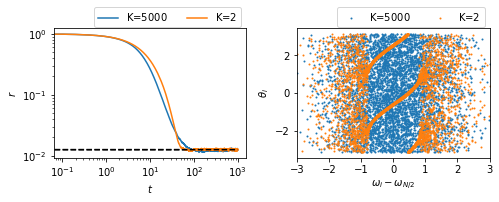

In [13]:
N=5000
Ks=[5000,2]
dt=0.1

plt.subplots(1,2,figsize=(7,3))

for K in Ks:
    plt.subplot(1,2,1)
    r=np.load('data/%i_lorentz/%i/avgorder.npy'%(N,K))
    plt.plot(dt*np.arange(len(r)),r,label='K=$%i$'%K)
    plt.plot(dt*np.arange(len(r)),(np.pi/4)**0.5/(N**0.5)*np.ones(len(r)),ls='--',c='black')
    plt.gca().legend(bbox_to_anchor=(1, 1.2),ncol=2)
    plt.ylabel('$r$')
    plt.xlabel(r'$t$')
    plt.xscale('log')
    plt.yscale('log')

    plt.subplot(1,2,2)
    filebase='data/%i/%i/%i'%(N,K,1)
    omega=np.fromfile(filebase+'frequencies.dat',np.float32)
    theta=np.mod(np.fromfile(filebase+'fs.dat',dtype=np.float32)[:N]+np.pi,2*np.pi)-np.pi
    plt.scatter(omega-np.median(omega),theta,s=1,label='K=$%i$'%K)
    plt.xlabel('$\omega_i$')
    plt.ylabel(r'$\theta_i$')

plt.gca().legend(bbox_to_anchor=(1, 1.2),ncol=2)

plt.xlim(-3,3)
plt.xlabel('$\omega_i-\omega_{N/2}$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.savefig('5000lorentz.pdf')
plt.show()

### Order parameter averaged over 750 seeds, for normally distributed frequencies

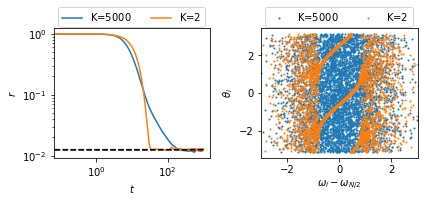

In [14]:
N=5000
Ks=[5000,2]
dt=0.1

plt.subplots(1,2,figsize=(6,3))

for K in Ks:
    plt.subplot(1,2,1)
    r=np.load('data/%i/%i/avgorder.npy'%(N,K))
    plt.plot(dt*np.arange(len(r)),r,label='K=$%i$'%K)
    plt.plot(dt*np.arange(len(r)),(np.pi/4)**0.5/(N**0.5)*np.ones(len(r)),ls='--',c='black')
    plt.gca().legend(bbox_to_anchor=(1, 1.2),ncol=2)
    plt.ylabel('$r$')
    plt.xlabel(r'$t$')
    plt.xscale('log')
    plt.yscale('log')

    plt.subplot(1,2,2)
    filebase='data/%i/%i/%i'%(N,K,1)
    omega=np.fromfile(filebase+'frequencies.dat',np.float32)
    theta=np.mod(np.fromfile(filebase+'fs.dat',np.float32)+np.pi,2*np.pi)[:N]-np.pi
    plt.scatter(omega-np.median(omega),theta,s=1,label='K=$%i$'%K)
    plt.xlabel('$\omega_i$')
    plt.ylabel(r'$\theta_i$')

plt.gca().legend(bbox_to_anchor=(1, 1.2),ncol=2)

plt.xlim(-3,3)
plt.xlabel('$\omega_i-\omega_{N/2}$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.savefig('5000normal.pdf')
plt.show()

### Order parameter averaged over 500 seeds, for normally distributed frequencies with much larger N

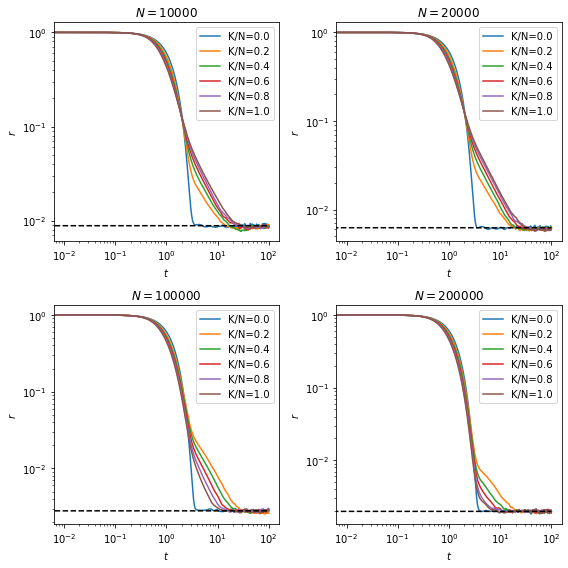

In [15]:
dt=0.01
seed=1
seeds=500
rows=101

Ns=[10000, 20000, 100000, 200000]
fig,ax=plt.subplots(2,2,figsize=(8,8))

ind=1
for N in Ns:
    Ks=[0,2*N//10,4*N//10,6*N//10,8*N//10,N]
        
    plt.subplot(2,2,ind)
    for K in Ks:
        if os.path.exists('data/%i/%i/avgorder.npy'%(N,K)):
            plt.plot(dt*np.arange(10001),np.load('data/%i/%i/avgorder.npy'%(N,K)),label='K/N=%.1f'%(K/N))
            plt.yscale('log')
            plt.xscale('log',base=10,subs=np.arange(10))
            plt.xlabel('$t$')
            plt.ylabel('$r$')

    plt.plot(dt*np.arange(10001),(np.pi/4)**0.5/(N**0.5)*np.ones(10001),ls='--',c='black')
    plt.title('$N=%i$'%N)
    ind=ind+1


    
    plt.legend()

plt.tight_layout()
plt.savefig('orders.pdf')
plt.show()

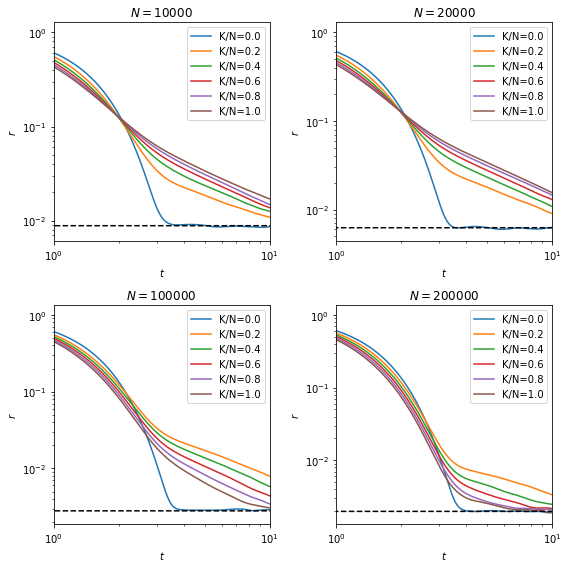

In [16]:
dt=0.01
seed=1
seeds=500
rows=101

Ns=[10000, 20000, 100000, 200000]
fig,ax=plt.subplots(2,2,figsize=(8,8))

ind=1
for N in Ns:
    Ks=[0,2*N//10,4*N//10,6*N//10,8*N//10,N]
        
    plt.subplot(2,2,ind)
    for K in Ks:
        if os.path.exists('data/%i/%i/avgorder.npy'%(N,K)):
            plt.plot(dt*np.arange(10001),np.load('data/%i/%i/avgorder.npy'%(N,K)),label='K/N=%.1f'%(K/N))
            plt.yscale('log')
            plt.xscale('log',base=10,subs=np.arange(10))
            plt.xlabel('$t$')
            plt.ylabel('$r$')
            plt.xlim(1,10)

    plt.plot(dt*np.arange(10001),(np.pi/4)**0.5/(N**0.5)*np.ones(10001),ls='--',c='black')
    plt.title('$N=%i$'%N)
    ind=ind+1


    
    plt.legend()

plt.tight_layout()
plt.savefig('orders2.pdf')

plt.show()

### SINDy fits

(x0)' = -2.231 x0 + 2.173 x0^2
0.9965740568243053
(x0)' = -10.440 x0^2 + 26.548 x0^3 + -22.515 x0^4
0.9997244001726726


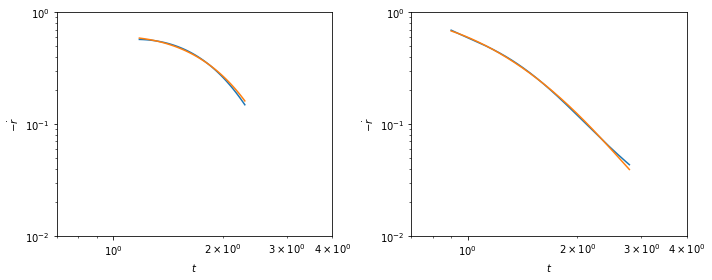

In [17]:
import pysindy as ps
N=5000
dt=0.01

plt.subplots(1,2,figsize=(10,4))

K=2
r=np.load('data/%i/%i/avgorder.npy'%(N,K))
ind0=np.where(r<0.5)[0][0]
ind=np.where(r<5/N**0.5)[0][0]

lib=ps.PolynomialLibrary(degree=5)
opt=ps.STLSQ(alpha=0,threshold=2,normalize_columns=True)
model=ps.SINDy(feature_library=lib,optimizer=opt)
model.fit(r[ind0:ind].reshape(-1,1),t=dt)
model.print()
print(model.score(r[ind0:ind].reshape(-1,1),t=dt))
plt.subplot(1,2,1)
plt.plot(dt*ind0+dt*np.arange(ind-ind0),-model.predict(r[ind0:ind].reshape(-1,1)))
plt.plot(dt*ind0+dt*np.arange(ind-ind0),-ps.FiniteDifference(axis=0)(r[ind0:ind].reshape(-1,1),t=dt))
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$-\dot{r}$')
plt.xlabel(r'$t$')
plt.xlim(0.7,4)
plt.ylim(1e-2,1)


K=N
r=np.load('data/%i/%i/avgorder.npy'%(N,K))
ind0=np.where(r<0.5)[0][0]
ind=np.where(r<5/N**0.5)[0][0]

lib=ps.PolynomialLibrary(degree=5)
opt=ps.STLSQ(alpha=0,threshold=2,normalize_columns=True)
model=ps.SINDy(feature_library=lib,optimizer=opt)
model.fit(r[ind0:ind].reshape(-1,1),t=dt)
model.print()
print(model.score(r[ind0:ind].reshape(-1,1),t=dt))
plt.subplot(1,2,2)
plt.plot(dt*ind0+dt*np.arange(ind-ind0),-model.predict(r[ind0:ind].reshape(-1,1)))
plt.plot(dt*ind0+dt*np.arange(ind-ind0),-ps.FiniteDifference(axis=0)(r[ind0:ind].reshape(-1,1),t=dt))
plt.ylabel(r'$-\dot{r}$')
plt.xlabel(r'$t$')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.7,4)
plt.ylim(1e-2,1)

plt.tight_layout()
plt.savefig('fig2.pdf')
plt.show()

### Benchmark against solve_ivp

runtime: 127.978962


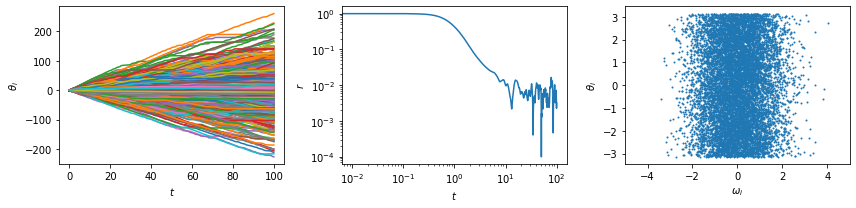

In [18]:
np.random.seed(1)
N=10000
K=10000
omega=np.fromfile('data/test64frequencies.dat')
adj=np.fromfile('data/test64adj.dat').reshape((N,N))

sigma=1.75
t1=100
dt=0.01
dt1=dt/1000

theta=np.zeros(N)

start=timeit.default_timer()
sol=solve_ivp(kuramoto, [0, t1], theta, rtol=0, atol=1E-6, args=(omega, sigma, adj), dense_output=True, method='RK45')
stop=timeit.default_timer()
print("runtime: %f"%(stop-start))

t=dt*np.arange(10001)
thetas=sol.sol(t).T
r=np.abs(np.mean(np.exp(1j*thetas),axis=1))


plt.subplots(1,3,figsize=(12,3))
plt.subplot(1,3,1)
plt.plot(dt*np.arange(len(thetas)),thetas)
plt.xlabel('$t$')
plt.ylabel(r'$\theta_i$')

plt.subplot(1,3,2)
plt.plot(dt*np.arange(len(r)),r)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('$r$')

plt.subplot(1,3,3)
order=np.argsort(omega)
plt.scatter(omega,np.mod(thetas[-1]+np.pi,2*np.pi)-np.pi,s=1)
plt.xlim(np.median(omega)-5,np.median(omega)+5)
plt.xlabel('$\omega_i$')
plt.ylabel(r'$\theta_i$')

plt.tight_layout()
plt.show()

./kuramoto -N 10000 -K 10000 -c 1.750000 -t 100.000000 -d 0.010000 -s 1 -nv data/test 

runtime: 9.624590



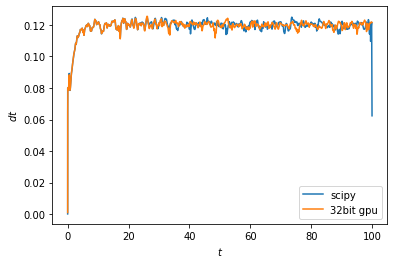

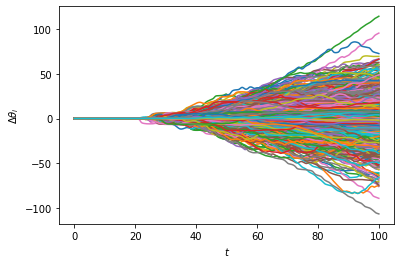

In [19]:
filebase='data/test'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

plt.plot(sol.t[:-1],np.diff(sol.t),label='scipy')
plt.plot(np.fromfile(filebase+'times.dat',dtype=np.float32)[:-1],np.diff(np.fromfile(filebase+'times.dat',dtype=np.float32)),label='32bit gpu')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$dt$')
plt.show()

plt.plot(t,thetas-np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N)))
plt.xlabel('$t$')
plt.ylabel(r'$\Delta\theta_i$')
plt.show()

./kuramoto -N 10000 -K 10000 -c 1.750000 -t 100.000000 -d 0.010000 -s 1 -nvA data/testA 

runtime: 28.431965



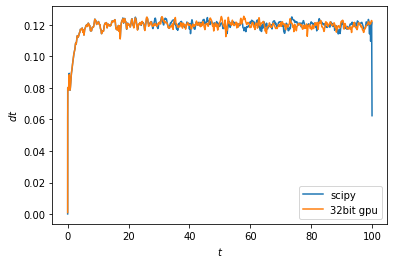

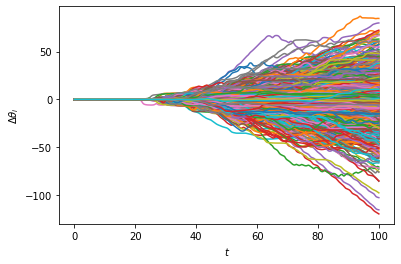

In [20]:
filebase='data/testA'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

plt.plot(sol.t[:-1],np.diff(sol.t),label='scipy')
plt.plot(np.fromfile(filebase+'times.dat',dtype=np.float32)[:-1],np.diff(np.fromfile(filebase+'times.dat',dtype=np.float32)),label='32bit gpu')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$dt$')
plt.show()

plt.plot(t,thetas-np.fromfile(filebase+'thetas.dat',dtype=np.float32).reshape((-1,N)))
plt.xlabel('$t$')
plt.ylabel(r'$\Delta\theta_i$')
plt.show()

./kuramoto_64 -N 10000 -K 10000 -c 1.750000 -t 100.000000 -d 0.010000 -s 1 -nv data/test64 

runtime: 25.083427



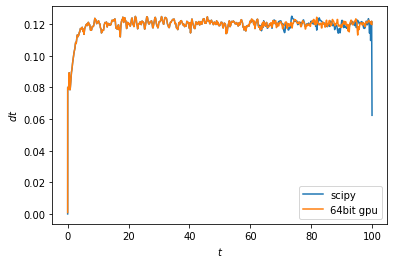

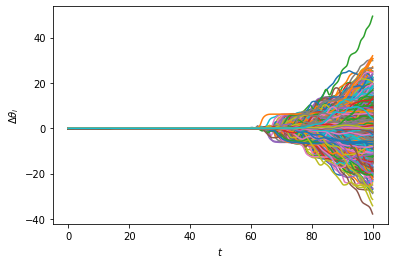

In [21]:
filebase='data/test64'
file=open(filebase+'.out')
lines=file.readlines()
N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
N=int(N)
K=int(K)
print(lines[1])
print(lines[-1])
file.close()

plt.plot(sol.t[:-1],np.diff(sol.t),label='scipy')
plt.plot(np.fromfile(filebase+'times.dat',dtype=np.float64)[:-1],np.diff(np.fromfile(filebase+'times.dat',dtype=np.float64)),label='64bit gpu')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$dt$')
plt.show()

plt.plot(t,thetas-np.fromfile(filebase+'thetas.dat',dtype=np.float64).reshape((-1,N)))
plt.xlabel('$t$')
plt.ylabel(r'$\Delta\theta_i$')
plt.show()

### Scaling of the maximum frequency $\omega_M$

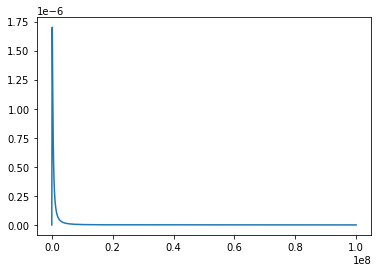

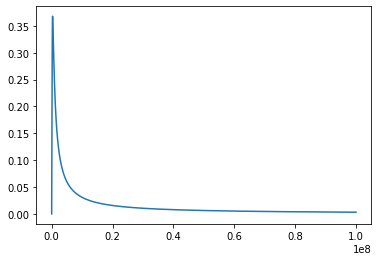

0.9968219776969255
1647530.735604397
1.6475307356043971


In [22]:
def func_cauchy(omega,N):
    return N/(np.pi*(1+omega**2))*(1/np.pi*np.arctan(omega)+0.5)**(N-1)
def func_cauchy2(omega,N):
    return N*omega/(np.pi*(1+omega**2))*(1/np.pi*np.arctan(omega)+0.5)**(N-1)
    
N=1000000
omegamax=100*N
omegamin=0
num=100000
omega=omegamax+(omegamin-omegamax)*np.arange(num)/num
a=func_cauchy(omega,N)
a2=func_cauchy2(omega,N)
plt.plot(omega,a)
plt.show()
plt.plot(omega,a2)
plt.show()
print(np.sum(a*(omegamax-omegamin)/num))
print(np.sum(a2*(omegamax-omegamin)/num))
print(np.sum(a2*(omegamax-omegamin)/num)/N)

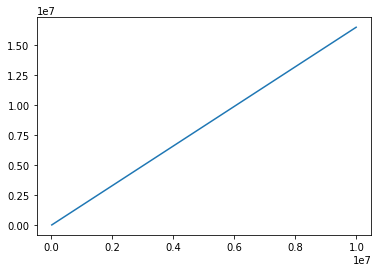

In [23]:
N=10000
Ns=[1000,10000,100000,1000000]
Ns=np.arange(10000,10000000,10000)
test=[]
for N in Ns:
    omegamax=100*N
    omegamin=0
    omega=omegamax+(omegamin-omegamax)*np.arange(num)/num
    a2=func_cauchy2(omega,N)
    test=test+[np.sum(a2*(omegamax-omegamin)/num)]
plt.plot(Ns,test)

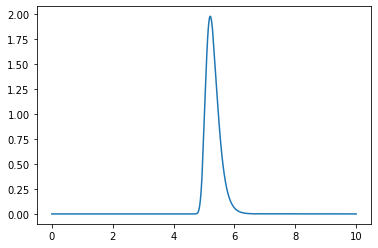

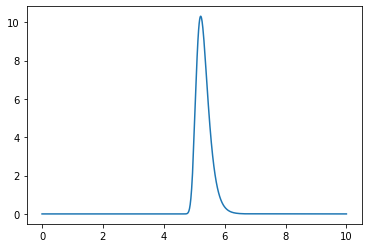

1.0000000000059996
5.3009540102042685
1.3203746328990724


In [24]:
def func_normal(omega,N):
    return N*np.exp(-omega**2/2)/(2*np.pi)**0.5*(0.5+0.5*erf(omega/2**0.5))**(N-1)
def func_normal2(omega,N):
    return N*omega*np.exp(-omega**2/2)/(2*np.pi)**0.5*(0.5+0.5*erf(omega/2**0.5))**(N-1)

N=10000000
omegamax=10
omegamin=0
num=100000
omega=omegamax+(omegamin-omegamax)*np.arange(num)/num
a=func_normal(omega,N)
a2=func_normal2(omega,N)
plt.plot(omega,a)
plt.show()
plt.plot(omega,a2)
plt.show()
print(np.sum(a*(omegamax-omegamin)/num))
print(np.sum(a2*(omegamax-omegamin)/num))
print(np.sum(a2*(omegamax-omegamin)/num)/(np.log(N)**0.5))

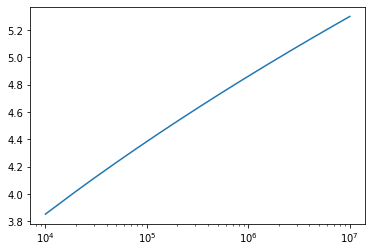

In [25]:
Ns=[1000,10000,100000,1000000]
Ns=np.arange(10000,10000000,10000)
test=[]
for N in Ns:
    a2=func_normal2(omega,N)
    test=test+[np.sum(a2*(omegamax-omegamin)/num)]
plt.plot(Ns,test)
plt.xscale('log')

### Averaging results from cluster simulations

In [ ]:
# Make avgorder from cluster output

# seeds=750
# Ns=5000*np.arange(1,2)
# for N in Ns:
#     Ks=[0,2,N]
#     for K in Ks:
#         rs=[]
#         omegas=[]
#         thetas=[]
#         for seed in range(1,seeds+1):
#             filebase='data/%i/%i/%i'%(N,K,seed)
#             if os.path.exists(filebase+'order.dat'):
#                 r=np.fromfile(filebase+'order.dat',dtype=np.float32)
#                 if r.shape[0]==10001:
#                     rs=rs+[r]
#                 else:
#                     print(seed,filebase,len(r))
#         if len(rs)>0:
#             print('%i\t%i\t%i\t\n'%(N,K,len(rs)),end='')
#             try:
#                 r1=np.mean(rs,axis=0)
#                 np.save('data/%i/%i/avgorder.npy'%(N,K),r1)
#             except Exception as e:
#                 print(np.where([r.shape[0]!=10001 for r in rs])[0])

In [ ]:
# Make avgorder from cluster output

# seeds=750
# Ns=5000*np.arange(1,2)
# for N in Ns:
#     Ks=[0,2,N]
#     for K in Ks:
#         rs=[]
#         omegas=[]
#         thetas=[]
#         for seed in range(1,seeds+1):
#             filebase='data/%i_lorentz/%i/%i'%(N,K,seed)
#             if os.path.exists(filebase+'order.dat'):
#                 r=np.fromfile(filebase+'order.dat',dtype=np.float32)
#                 if r.shape[0]==10001:
#                     rs=rs+[r]
#                 else:
#                     print(seed,filebase,len(r))
#         if len(rs)>0:
#             print('%i_lorentz\t%i\t%i\t\n'%(N,K,len(rs)),end='')
#             try:
#                 r1=np.mean(rs,axis=0)
#                 np.save('data/%i_lorentz/%i/avgorder.npy'%(N,K),r1)
#             except Exception as e:
#                 print(np.where([r.shape[0]!=10001 for r in rs])[0])

In [ ]:
# Make avgorder from cluster output

# seeds=500
# Ns=10000*np.arange(1,10)
# for N in Ns:
#     Ks=[0,2*N//10,4*N//10,6*N//10,8*N//10,N]
#     for K in Ks:
#         rs=[]
#         omegas=[]
#         thetas=[]
#         for seed in range(1,seeds+1):
#             filebase='data/%i/%i/%i'%(N,K,seed)
#             if os.path.exists(filebase+'order.dat'):
#                 r=np.fromfile(filebase+'order.dat',dtype=np.float32)
#                 if r.shape[0]==10001:
#                     rs=rs+[r]
#                 else:
#                     print(seed,filebase,len(r))
#         if len(rs)>0:
#             print('%i\t%i\t%i\t\n'%(N,K,len(rs)),end='')
#             try:
#                 r1=np.mean(rs,axis=0)
#                 np.save('data/%i/%i/avgorder.npy'%(N,K),r1)
#             except Exception as e:
#                 print(np.where([r.shape[0]!=10001 for r in rs])[0])

In [ ]:
# Make avgorder from cluster output

# seeds=500
# Ns=100000*np.arange(1,3)
# for N in Ns:
#     Ks=[0,2*N//10,4*N//10,6*N//10,8*N//10,N]
#     for K in Ks:
#         rs=[]
#         omegas=[]
#         thetas=[]
#         for seed in range(1,seeds+1):
#             filebase='data/%i/%i/%i'%(N,K,seed)
#             if os.path.exists(filebase+'order.dat'):
#                 r=np.fromfile(filebase+'order.dat',dtype=np.float32)
#                 if r.shape[0]==10001:
#                     rs=rs+[r]
#                 else:
#                     print(seed,filebase,len(r))
#         if len(rs)>0:
#             print('%i\t%i\t%i\t\n'%(N,K,len(rs)),end='')
#             try:
#                 r1=np.mean(rs,axis=0)
#                 np.save('data/%i/%i/avgorder.npy'%(N,K),r1)
#             except Exception as e:
#                 print(np.where([r.shape[0]!=10001 for r in rs])[0])